In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from google.colab import drive
import random


Loading dataset

In [2]:

drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/animal_data.zip"
extract_path = "/content/animal_data"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)


Mounted at /content/drive


In [3]:

!find /content/animal_data -name "._*" -delete
!find /content/animal_data -type f -not -iname "*.jpg" -not -iname "*.jpeg" -not -iname "*.png" -delete
!rm -rf /content/animal_data/animal_data/animal_data
!rm -rf /content/animal_data/animal_data/__MACOSX

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/animal_data/animal_data",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(256, 256),
    batch_size=32,
    color_mode="rgb"
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/animal_data/animal_data",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(256, 256),
    batch_size=32,
    color_mode="rgb"
)

class_names = train_data.class_names
# class_names = class_names[0:14]
print(class_names)


Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


In [5]:
def unpack(data):
    images = []
    labels = []

    data = data.unbatch()

    for img, label in ds:
        images.append(img.numpy())
        labels.append(label.numpy())

    return np.array(images), np.array(labels)

train_images, train_labels = unpack(train_data)
test_images, test_labels = unpack(test_data)

train_images = tf.image.rgb_to_grayscale(train_images).numpy()
test_images  = tf.image.rgb_to_grayscale(test_images).numpy()


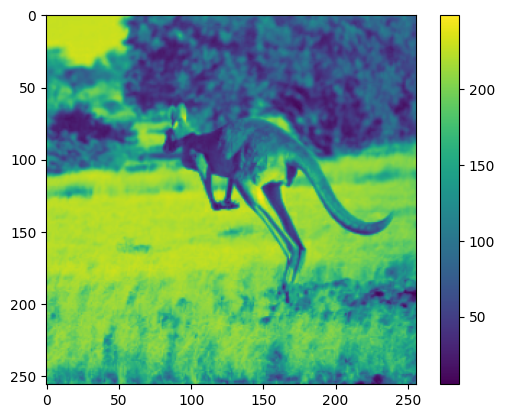

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

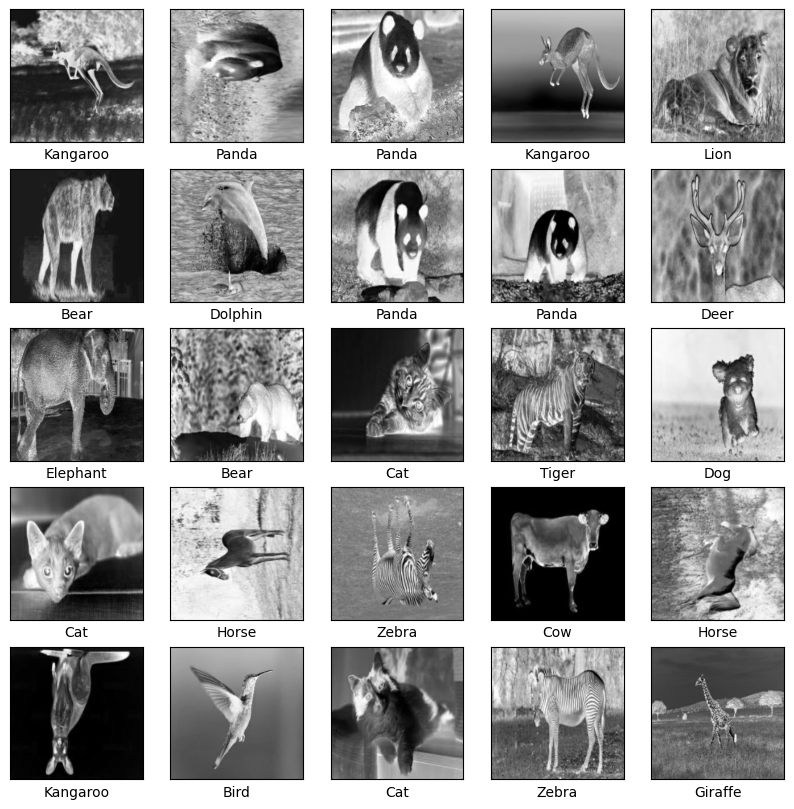

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.1057 - loss: 20.8707 - val_accuracy: 0.2036 - val_loss: 2.4091
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.3042 - loss: 2.2422 - val_accuracy: 0.3995 - val_loss: 1.9038
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5861 - loss: 1.4692 - val_accuracy: 0.6057 - val_loss: 1.4258
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8265 - loss: 0.7887 - val_accuracy: 0.6701 - val_loss: 1.2541
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.9521 - loss: 0.3767 - val_accuracy: 0.6985 - val_loss: 1.2006
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.9799 - loss: 0.2107 - val_accuracy: 0.6624 - val_loss: 1.3413
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9902 - loss: 0.1234 - val_accuracy: 0.6778 - val_loss: 1.2735
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9983 - loss: 0.0842 - val_accuracy: 0.7113 - 

In [9]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)

print('\nTest accuracy:', test_acc)

13/13 - 18s - 1s/step - accuracy: 0.6907 - loss: 1.4604

Test accuracy: 0.6907216310501099


In [10]:
def conv(data):
    images, labels = [], []
    for img, lbl in data.unbatch():
        images.append(img.numpy())
        labels.append(lbl.numpy())
    return np.array(images), np.array(labels)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
test_images_np, test_labels_np = conv(test_data)
predictions = probability_model.predict(test_images_np)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 495ms/step


In [12]:
predictions[0]


array([1.5143600e-06, 9.3322067e-04, 7.9320256e-07, 7.3728975e-06,
       1.9821343e-04, 2.8497134e-05, 7.4051436e-06, 8.4713599e-07,
       3.1591876e-04, 1.5952288e-05, 9.9843407e-01, 1.9132598e-05,
       2.8812432e-05, 8.3556324e-06, 2.4968784e-08], dtype=float32)

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

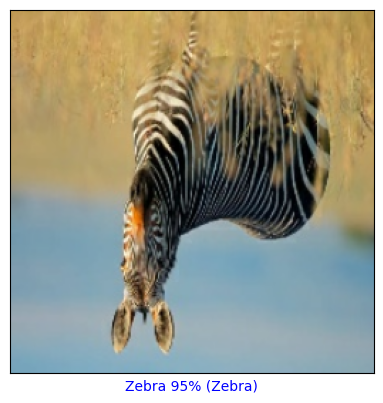

In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

for test_images_batch, test_labels_batch in test_data.take(1):
    predictions_batch = probability_model.predict(test_images_batch, verbose=0)

    i = 0
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions_batch[i], test_labels_batch.numpy(), test_images_batch.numpy()/255)

    # plt.subplot(1, 2, 2)
    # plot_value_array(i, predictions_batch[i], test_labels_batch.numpy())

    plt.tight_layout()
    plt.show()

    break